In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
dftrain=pd.read_csv("/home/siddharth/Desktop/bigmart sales Train.csv")

In [3]:
dftest=pd.read_csv("/home/siddharth/Desktop/bigmart sales Test.csv")

In [255]:
dftrain.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
dftrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#outlet_size and Item_weight have missing values

## Organizing catogorical columns:


In [115]:
cat=dftrain.select_dtypes(include="object")

In [116]:
cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [117]:
print(cat["Item_Identifier"].unique().shape)

(1559,)


In [118]:
#dropping column from dftrain:
df=dftrain.drop(["Item_Identifier"], axis=1)


In [119]:
cat["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [120]:
df=df.replace({"LF": "Low Fat", "low fat":"Low Fat", "reg": "Regular"})

In [121]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [122]:
cat["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [123]:
cat["Outlet_Identifier"].unique()
## Dropping Outlet_Identifier
df=df.drop(["Outlet_Identifier"], axis=1)

In [124]:
cat["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [125]:
cat["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [126]:
cat["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

## BigMart Customer shopping trends:

## 1) Fat_Content :

In [127]:
Fat_Content=pd.DataFrame({"Fat":df["Item_Fat_Content"], "Sales":df["Item_Outlet_Sales"]})

In [128]:
Fat_Contentpiv=Fat_Content.pivot_table(columns="Fat", values="Sales", aggfunc='mean') 

<AxesSubplot:xlabel='Fat', ylabel='Sales'>

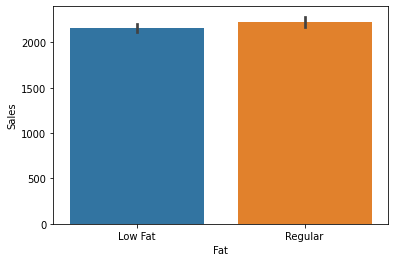

In [129]:
Fat_Contentpiv
sns.barplot(x=Fat_Content["Fat"], y=Fat_Content["Sales"])

In [130]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Average sales of Regular products is slightly higher than that of Low Fat products although BigMart carries more Low Fat products than Regular Products**

## 2) Item_Type:

In [131]:
typeoffood=df.groupby(["Item_Type"])["Item_Outlet_Sales"].mean().sort_values(ascending=False )

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64


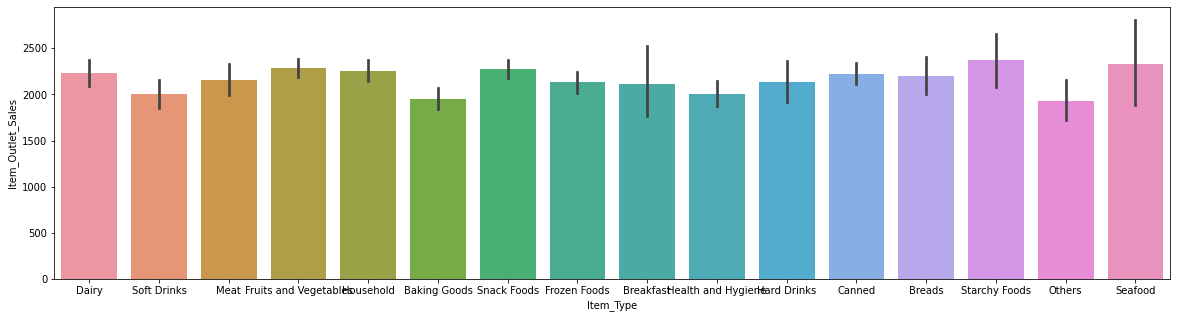

In [132]:
plt.figure(figsize=(20,5))
sns.barplot(x=df["Item_Type"], y= df["Item_Outlet_Sales"])
print(typeoffood)

**Highest number of items bought belong to the starchy foods category** 

## 3) Item_Visibility:

In [133]:
df["Item_Visibility"].dtype

dtype('float64')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

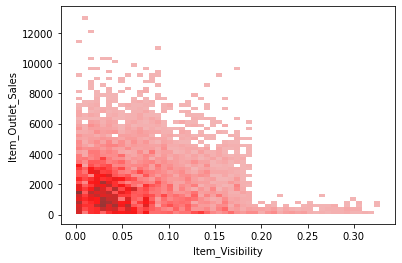

In [154]:
sns.histplot(x=df["Item_Visibility"], y=df["Item_Outlet_Sales"], color="red")

## 4) Item_MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

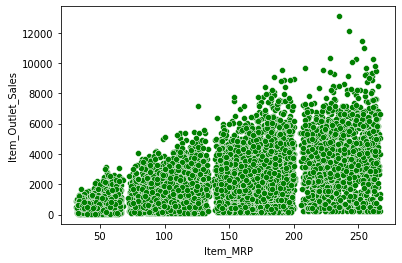

In [153]:
sns.scatterplot(x=df["Item_MRP"], y=df["Item_Outlet_Sales"], color= "green")

**Items_sales seem to increase with increase in MRP**

## 5) Outlet Characteristics and Sales:

Outlet_Establishment_Year                
Outlet_Location_Type       
Outlet_Type               

### i) Outlet_Establishment_Year

<AxesSubplot:ylabel='Item_Outlet_Sales'>

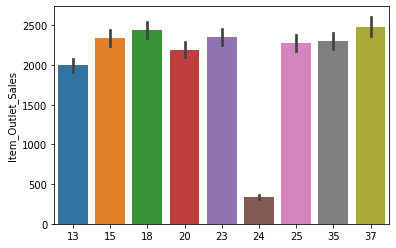

In [136]:
sns.barplot(x=[2022-y for y in df["Outlet_Establishment_Year"]], y=df["Item_Outlet_Sales"])

In [137]:
age=pd.DataFrame([2022-y for y in df["Outlet_Establishment_Year"]])

In [138]:
age.value_counts().sort_values(ascending=True)

24     555
15     926
13     928
20     929
18     930
23     930
25     930
35     932
37    1463
dtype: int64

**Here we see that number of stores matter more compared to age of store, most number of stores are 37 years old this also reflects on sales. fewest number of stores are 24 years old hence lowest number of sales**  

### ii) Outlet_Location_Type:

In [139]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

/home/siddharth/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

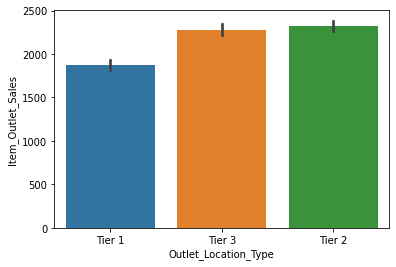

In [140]:
sns.barplot(df["Outlet_Location_Type"], y=df["Item_Outlet_Sales"])

In [141]:
df["Outlet_Location_Type"].value_counts().sort_values(ascending=True)

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

**Here we see that Bigmart has larger number of stores in Tier2 and Tier3 locations, hence we cannot tell certainly if Outlet_Location_Type has a direct effect on sales**

### iii) Outlet_Type

In [142]:
df["Outlet_Type"].dtype

dtype('O')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

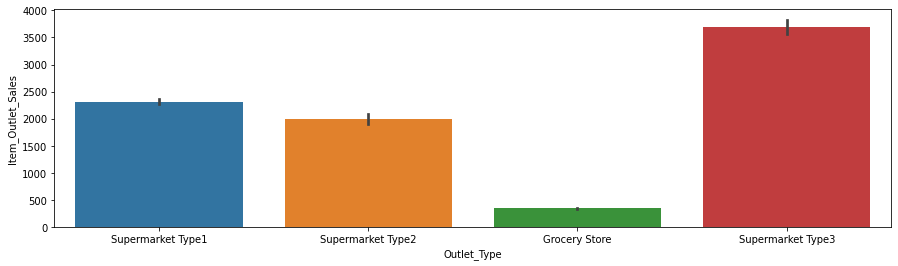

In [143]:
plt.figure(figsize=(15,4))
sns.barplot(x=df['Outlet_Type'], y= df["Item_Outlet_Sales"])

In [144]:
print(df["Outlet_Type"].value_counts().sort_values(ascending=True))

Supermarket Type2     928
Supermarket Type3     935
Grocery Store        1083
Supermarket Type1    5577
Name: Outlet_Type, dtype: int64


**Clearly Supermarkets fare better in sales compared to Grocery stores although bigmart has a large number of grocery stores they contribute least to number of sales, Super market Type 2 and 3 contribute to a large number of sales although they are least in number** 

## Filling Missing Values

In [145]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

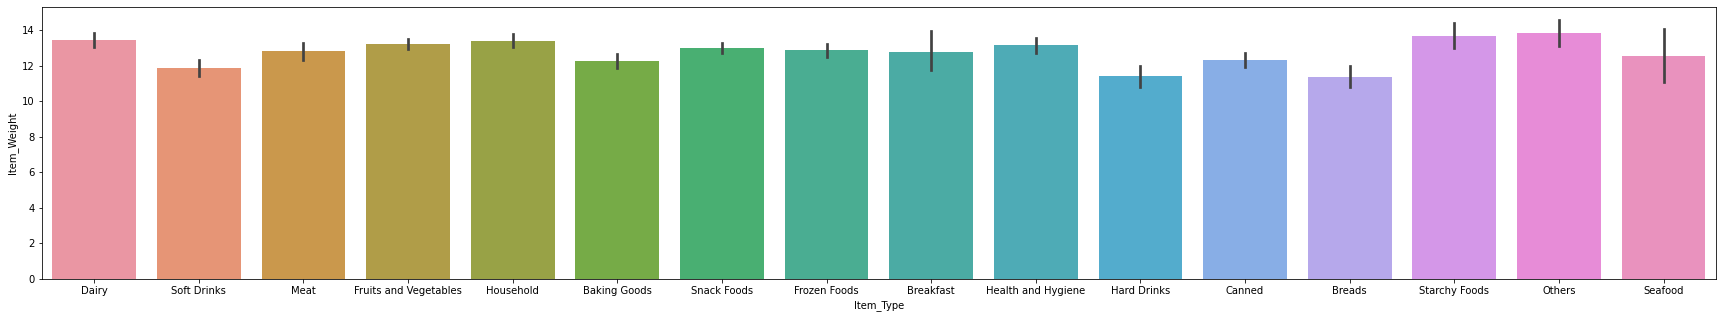

In [151]:
plt.figure(figsize= (30, 5))
sns.barplot(x=df["Item_Type"],y=df["Item_Weight"])

In [152]:
# grouping by item_type and filling missing values of weight

In [156]:
df.groupby(["Item_Type"])["Item_Weight"].mean().sort_values(ascending=False)

Item_Type
Others                   13.853285
Starchy Foods            13.690731
Dairy                    13.426069
Household                13.384736
Fruits and Vegetables    13.224769
Health and Hygiene       13.142314
Snack Foods              12.987880
Frozen Foods             12.867061
Meat                     12.817344
Breakfast                12.768202
Seafood                  12.552843
Canned                   12.305705
Baking Goods             12.277108
Soft Drinks              11.847460
Hard Drinks              11.400328
Breads                   11.346936
Name: Item_Weight, dtype: float64

In [292]:
df2=df.drop(["Outlet_Size"], axis=1)

In [293]:
df2=df2.sort_values(["Item_Type"])

In [294]:
df2=df2.fillna(method= 'bfill')

In [295]:
df2.groupby(["Item_Type"])["Item_Weight"].mean().sort_values(ascending=False)

Item_Type
Others                   13.865562
Starchy Foods            13.785000
Household                13.372148
Dairy                    13.228724
Fruits and Vegetables    13.158636
Snack Foods              13.089804
Health and Hygiene       13.012654
Meat                     12.996471
Breakfast                12.948318
Frozen Foods             12.903178
Canned                   12.210832
Baking Goods             12.078573
Seafood                  11.993828
Soft Drinks              11.697146
Breads                   11.365239
Hard Drinks              11.327360
Name: Item_Weight, dtype: float64

In [296]:
df2.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [298]:
df3=df2

In [299]:
df3["Outlet_Size"]=df["Outlet_Size"]

In [300]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 4261 to 5237
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Outlet_Size                6113 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB


In [325]:
df3=df3.sort_values(["Outlet_Type"])

In [326]:
df3=df3.fillna(method='ffill')

In [331]:
df3[df3["Outlet_Type"]=="Supermarket Type1"]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size
5422,6.030,Low Fat,0.022685,Dairy,178.1028,1987,Tier 3,Supermarket Type1,4604.6728,High
3713,16.100,Regular,0.063319,Dairy,180.9318,2004,Tier 2,Supermarket Type1,1984.7498,Small
3749,18.250,Regular,0.171174,Dairy,156.4630,2002,Tier 2,Supermarket Type1,938.7780,Small
5430,7.575,Low Fat,0.055502,Dairy,196.5768,2002,Tier 2,Supermarket Type1,1576.6144,Small
3694,6.920,Low Fat,0.038422,Dairy,62.5852,1987,Tier 3,Supermarket Type1,438.0964,High
...,...,...,...,...,...,...,...,...,...,...
3920,7.060,Regular,0.043969,Starchy Foods,57.6904,1999,Tier 1,Supermarket Type1,585.9040,Medium
6843,13.500,Regular,0.129077,Starchy Foods,95.2068,2002,Tier 2,Supermarket Type1,583.2408,Medium
3319,14.150,Low Fat,0.037902,Starchy Foods,126.3046,2004,Tier 2,Supermarket Type1,2614.5966,Small
5797,20.500,Low Fat,0.141675,Starchy Foods,90.7172,1987,Tier 3,Supermarket Type1,1605.9096,High


In [332]:
df3.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Size                  0
dtype: int64

<AxesSubplot:>

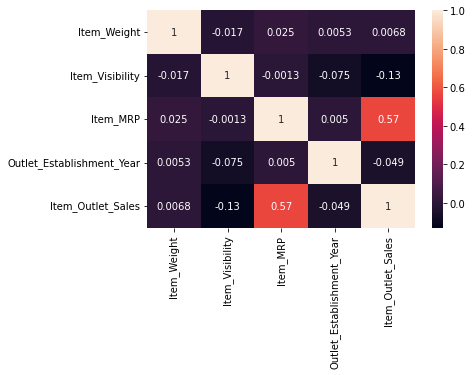

In [347]:
sns.heatmap(df3.corr(), annot= True)

## Splitting Data and Encoding Catogorical Columns.

In [477]:
x= df3.drop(["Item_Outlet_Sales"], axis=1)
y= df3["Item_Outlet_Sales"]
x["Outlet_Establishment_Year"]=[2022-y for y in x["Outlet_Establishment_Year"]]

In [478]:
x=pd.get_dummies(x)

In [505]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVR 
from sklearn.naive_bayes import GaussianNB

In [480]:
x_train, x_test, y_train, y_test= train_test_split(x,y)

In [481]:
pca=PCA(n_components=0.95)

In [482]:
pca_train=pca.fit_transform(x_train)
pca_test= pca.transform(x_test)

## 1) Linear Regression

In [483]:
lr= LinearRegression()
pipe1=Pipeline([("sc", StandardScaler()), ("lr", LinearRegression())])

In [484]:
lr.fit(x_train, y_train)

LinearRegression()

In [485]:
lr.score(x_test, y_test)

0.5679166597650285

In [486]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('lr', LinearRegression())])

In [487]:
pipe1.score(x_test, y_test)

0.56789079714877

## 2 ) Random Forest

In [559]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
param_grid={"max_depth":[5,10,20], "min_samples_leaf":[1,2,3]}

In [560]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [561]:
rf.score(x_test, y_test)

0.5757983252643074

In [562]:
cv= GridSearchCV(estimator=rf, param_grid=param_grid,verbose=2)

In [563]:
cv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   1.4s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=2; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=2; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=2; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=2; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=2; total time=   1.3s
[CV] END ....................max_depth=5, min_samples_leaf=3; total time=   1.3s
[CV] END ....................max_depth=5, min_sam

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 3]},
             verbose=2)

In [564]:
cv.score(x_test, y_test)

0.6040496514573845

## Preprocessing Test Data:

In [565]:
dftest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [566]:
dftest2= dftest.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)

In [567]:
dftest2["Outlet_Establishment_Year"]=[2022- y for y in dftest2["Outlet_Establishment_Year"]]

In [569]:
dftest2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,23,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,15,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,24,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,15,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,37,Medium,Tier 3,Supermarket Type3


In [570]:
dftest2["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [572]:
dftest2["Item_Fat_Content"]=dftest2["Item_Fat_Content"].replace({"reg":"Regular", "LF":"Low Fat", "low fat":"Low Fat"})

In [573]:
dftest2["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [576]:
dftest3= dftest2.drop(['Outlet_Size'],axis=1)

In [578]:
dftest3=dftest3.sort_values(['Item_Type'])
dftest3=dftest3.fillna(method="ffill")

In [579]:
dftest3["Outlet_Size"]=dftest2["Outlet_Size"]

In [580]:
dftest3=dftest3.sort_values(["Outlet_Type"])

In [581]:
dftest3=dftest3.fillna(method="bfill")

In [582]:
dftest3.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Size                  0
dtype: int64

In [584]:
new_test=pd.get_dummies(dftest3)

In [586]:
pred=cv.predict(new_test)

In [587]:
dftest3["Predicted_Sales"]= pred

In [588]:
dftest3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size,Predicted_Sales
450,5.98,Low Fat,0.072915,Fruits and Vegetables,145.1418,24,Tier 3,Grocery Store,Small,332.558992
1064,14.15,Low Fat,0.060162,Soft Drinks,42.0138,24,Tier 3,Grocery Store,Small,78.708847
936,17.70,Low Fat,0.085262,Household,127.7678,24,Tier 3,Grocery Store,Small,264.393091
2180,8.05,Low Fat,0.122631,Dairy,263.9226,37,Tier 1,Grocery Store,Small,561.673735
4360,16.20,Low Fat,0.032436,Soft Drinks,154.9972,24,Tier 3,Grocery Store,Small,396.316934


In [591]:
dftest3.sort_values(["Predicted_Sales"], ascending= False)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size,Predicted_Sales
4185,19.35,Regular,0.078021,Fruits and Vegetables,258.3646,37,Tier 3,Supermarket Type3,Medium,6747.552366
3399,20.35,Low Fat,0.112969,Household,252.8724,37,Tier 3,Supermarket Type3,Medium,6719.154282
4872,20.20,Low Fat,0.147217,Household,234.1616,37,Tier 3,Supermarket Type3,Medium,6698.627418
4,20.25,Regular,0.118599,Dairy,234.2300,37,Tier 3,Supermarket Type3,Medium,6675.702565
4146,18.35,Regular,0.065976,Fruits and Vegetables,249.0092,37,Tier 3,Supermarket Type3,Medium,6657.391193
...,...,...,...,...,...,...,...,...,...,...
2798,11.30,Regular,0.046577,Meat,34.5532,37,Tier 1,Grocery Store,Small,77.471248
211,6.26,Low Fat,0.111641,Household,38.8848,37,Tier 1,Grocery Store,Small,76.979617
3231,7.07,Regular,0.216601,Snack Foods,36.7874,37,Tier 1,Grocery Store,Small,76.895287
2167,18.25,Regular,0.072453,Snack Foods,37.7190,37,Tier 1,Grocery Store,Small,76.808887
